YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?


In [3]:
import textwrap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from functools import reduce
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')


In [4]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [5]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Cohabiting': 1,
        'Separate households': 2,
    }
}

In [6]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss given',
    'omo15i2_w2b': 'Anchor kiss desired',
    'pomo15i1_w2b': 'Partner kiss given',
    'pomo15i2_w2b': 'Partner kiss desired',
    'omo16i1_w2b': 'Anchor hold given',
    'omo16i2_w2b': 'Anchor hold desired',
    'pomo16i1_w2b': 'Partner hold given',
    'pomo16i2_w2b': 'Partner hold desired',
    'omo17i1_w2b': 'Anchor hug given',
    'omo17i2_w2b': 'Anchor hug desired',
    'pomo17i1_w2b': 'Partner hug given',
    'pomo17i2_w2b': 'Partner hug desired',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids',
    'sex': 'Anchor sex',
    'psex': 'Partner sex',
    'age': 'Anchor age',
    'page': 'Partner age',
    'loneliness': 'Anchor loneliness',
    'ploneliness': 'Partner loneliness',
    'cohab': 'Cohabitation',
    'confm': 'Anchor conflict management',
    'pconfm': 'Partner conflict management',
    'extr': 'Anchor extraversion',
    'agree': 'Anchor agreeableness',
    'consc': 'Anchor conscientiousness',
    'open': 'Anchor openess',
    'neur': 'Anchor neuroticism',
    'pextr': 'Partner extraversion',
    'pagree': 'Partner agreeableness',
    'pconsc': 'Partner conscientiousness',
    'popen': 'Partner openess',
    'pneur': 'Partner neuroticism',
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)
df = df.drop([
    'reldur', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1)

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [7]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(overall_options["satisfaction_options"])
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor kiss given'] = df['Anchor kiss given'].map(overall_options["omo_options"])
df['Anchor hold given'] = df['Anchor hold given'].map(overall_options["omo_options"])
df['Anchor hug given'] = df['Anchor hug given'].map(overall_options["omo_options"])
df['Anchor kiss desired'] = df['Anchor kiss desired'].map(overall_options["omo_options"])
df['Anchor hold desired'] = df['Anchor hold desired'].map(overall_options["omo_options"])
df['Anchor hug desired'] = df['Anchor hug desired'].map(overall_options["omo_options"])

df['Partner kiss given'] = df['Partner kiss given'].map(overall_options["omo_options"])
df['Partner hold given'] = df['Partner hold given'].map(overall_options["omo_options"])
df['Partner hug given'] = df['Partner hug given'].map(overall_options["omo_options"])
df['Partner kiss desired'] = df['Partner kiss desired'].map(overall_options["omo_options"])
df['Partner hold desired'] = df['Partner hold desired'].map(overall_options["omo_options"])
df['Partner hug desired'] = df['Partner hug desired'].map(overall_options["omo_options"])

df['Relationship length'] = df['reldur_class'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor loneliness'] = df['Anchor loneliness'].map(overall_options['loneliness_options'])
df['Partner loneliness'] = df['Partner loneliness'].map(overall_options['loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])


In [8]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df[df['Anchor age'] != -7]
df = df[df['Partner age'] != -7]
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [9]:
df = df.drop(['reldur_class'], axis=1)

In [10]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['Anchor age'][i] <= 20:
        df.loc[i, 'Anchor age group'] = 1
    elif 20 < df['Anchor age'][i] <= 30:
        df.loc[i, 'Anchor age group'] = 2
    elif 30 < df['Anchor age'][i] <= 40:
        df.loc[i, 'Anchor age group'] = 3
    elif 40 < df['Anchor age'][i] <= 50:
        df.loc[i, 'Anchor age group'] = 4
    elif 50 < df['Anchor age'][i]:
        df.loc[i, 'Anchor age group'] = 5

for i in range(0, len(df)):
    if df['Partner age'][i] <= 20:
        df.loc[i, 'Partner age group'] = 1
    elif 20 < df['Partner age'][i] <= 30:
        df.loc[i, 'Partner age group'] = 2
    elif 30 < df['Partner age'][i] <= 40:
        df.loc[i, 'Partner age group'] = 3
    elif 40 < df['Partner age'][i] <= 50:
        df.loc[i, 'Partner age group'] = 4
    elif 50 < df['Partner age'][i]:
        df.loc[i, 'Partner age group'] = 5


Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [11]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Given touch'] = np.mean(
        [df['Anchor kiss given'][i], df['Anchor hold given'][i], df['Anchor hug given'][i]])
    df.loc[i, 'Partner Given touch'] = np.mean(
        [df['Partner kiss given'][i], df['Partner hold given'][i], df['Partner hug given'][i]])

    df.loc[i, 'Anchor Desired touch'] = np.mean(
        [df['Anchor kiss desired'][i], df['Anchor hold desired'][i], df['Anchor hug desired'][i]])
    df.loc[i, 'Partner Desired touch'] = np.mean(
        [df['Partner kiss desired'][i], df['Partner hold desired'][i], df['Partner hug desired'][i]])

    df.loc[i, 'Anchor kiss diff'] = df['Anchor kiss given'][i] - df['Anchor kiss desired'][i]
    df.loc[i, 'Anchor hold diff'] = df['Anchor hold given'][i] - df['Anchor hold desired'][i]
    df.loc[i, 'Anchor hug diff'] = df['Anchor hug given'][i] - df['Anchor hug desired'][i]

    df.loc[i, 'Partner kiss diff'] = df['Partner kiss given'][i] - df['Partner kiss desired'][i]
    df.loc[i, 'Partner hold diff'] = df['Partner hold given'][i] - df['Partner hold desired'][i]
    df.loc[i, 'Partner hug diff'] = df['Partner hug given'][i] - df['Partner hug desired'][i]

In [12]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Deficit'] = np.mean(
        [df['Anchor kiss diff'][i], df['Anchor hold diff'][i], df['Anchor hug diff'][i]])
    df.loc[i, 'Partner Deficit'] = np.mean(
        [df['Partner kiss diff'][i], df['Partner hold diff'][i], df['Partner hug diff'][i]])

Start with some descriptive statistics, including a Correlation Matrix

In [13]:
individual_factors = [
    'Anchor Given touch',
    'Anchor Desired touch',
    'Anchor Deficit',
    'Partner Given touch',
    'Partner Desired touch',
    'Partner Deficit',
    # 'Anchor sex',
    'Anchor age',
    'Anchor life satisfaction',
    'Anchor loneliness',
    'Anchor extraversion',
    'Anchor agreeableness',
    'Anchor conscientiousness',
    'Anchor openess',
    'Anchor neuroticism',

    # 'Partner sex',
    'Partner age',
    'Partner life satisfaction',
    'Partner loneliness',
    'Partner extraversion',
    'Partner agreeableness',
    'Partner conscientiousness',
    'Partner neuroticism',
]

relationship_factors = [
    'Anchor Given touch',
    'Anchor Desired touch',
    'Anchor Deficit',
    'Partner Given touch',
    'Partner Desired touch',
    'Partner Deficit',

    'Anchor relationship satisfaction',
    'Anchor communication quality',
    'Anchor conflict management',
    'Partner relationship satisfaction',
    'Partner communication quality',
    'Partner conflict management',
    # 'Age difference',
    'Relationship length',
    'Kids',
    'Cohabitation',
]


In [14]:
# https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

Text(0.5, 1.0, 'Moderators of touch behavior, wanting and deprivation')

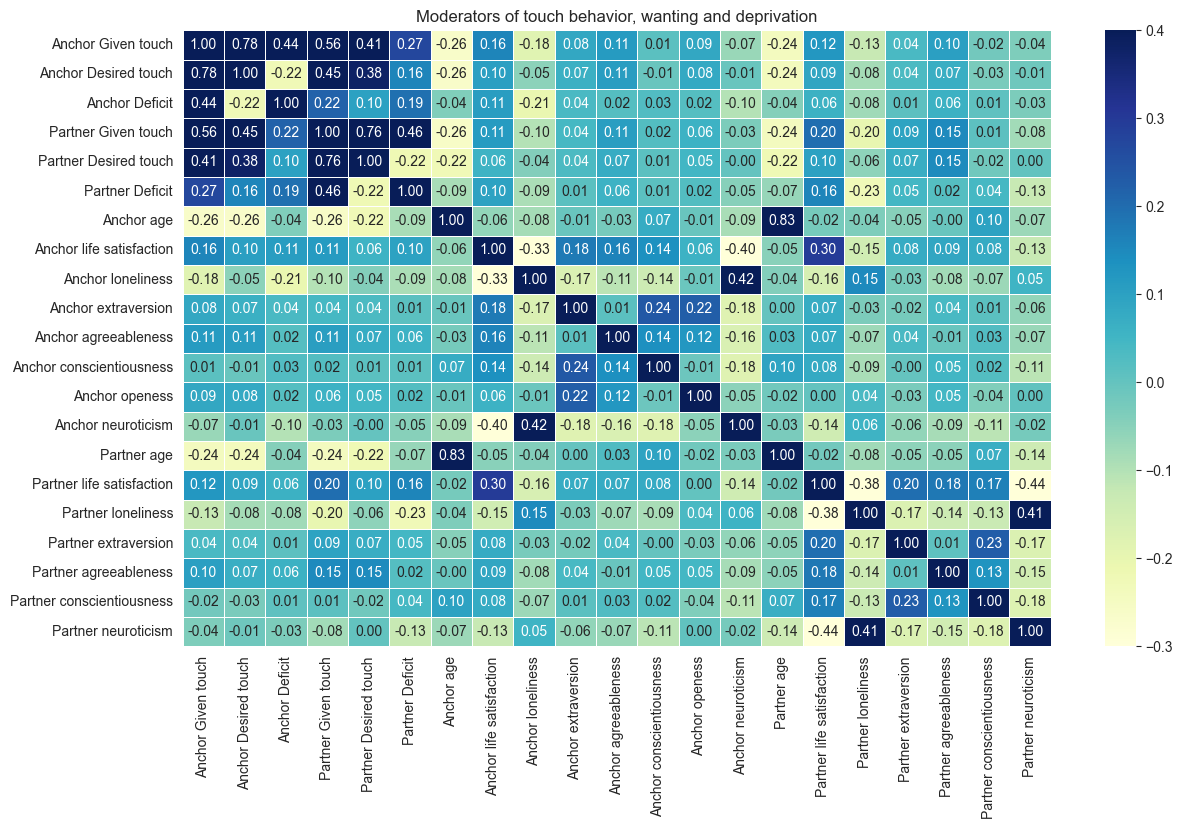

In [15]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df[
    individual_factors
].corr()

matrix = np.triu(correlation)

annot_mask = correlation <= -0.4

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.4, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            # annot=annot_mask,
            # mask=matrix
            )

plt.grid(False)
plt.title('Moderators of touch behavior, wanting and deprivation')
# plt.savefig('output/img/correlation/individual_factors.png', dpi=350, transparent=True, bbox_inches='tight')

Text(0.5, 1.0, 'Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')

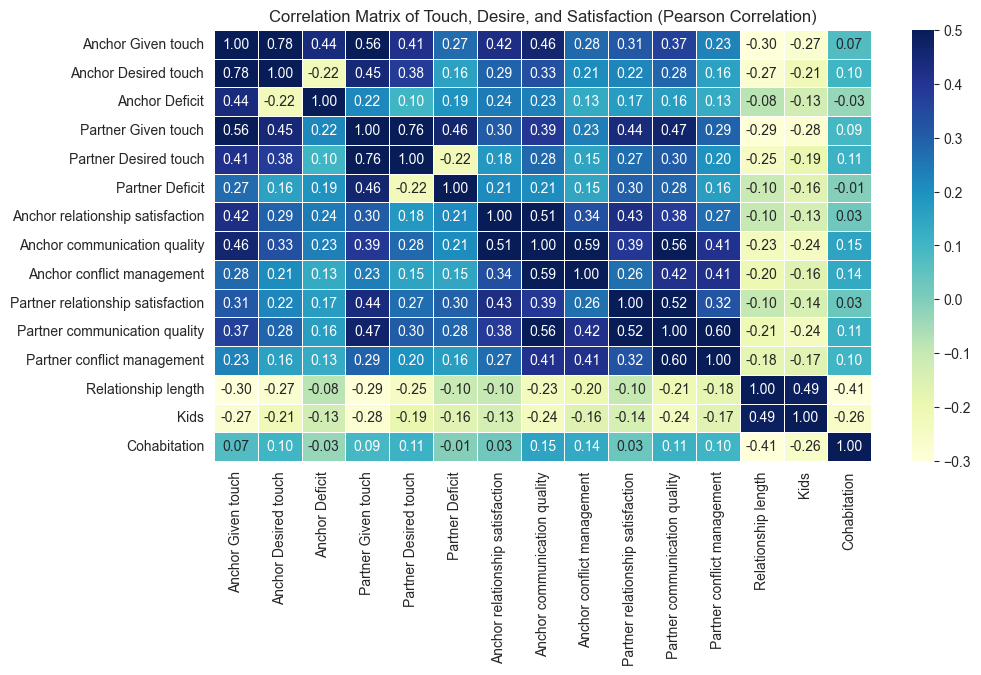

In [16]:
plt.figure(figsize=(10.6, 5.6))
plt.tight_layout()

correlation = df[
    relationship_factors
].corr()

matrix = np.triu(correlation)

annot_mask = correlation <= -0.4

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.5, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            # annot=annot_mask,
            # mask=matrix
            )
plt.grid(False)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
# plt.savefig('output/img/correlation/relationship_factors.png', dpi=350, transparent=True, bbox_inches='tight')

<Axes: >

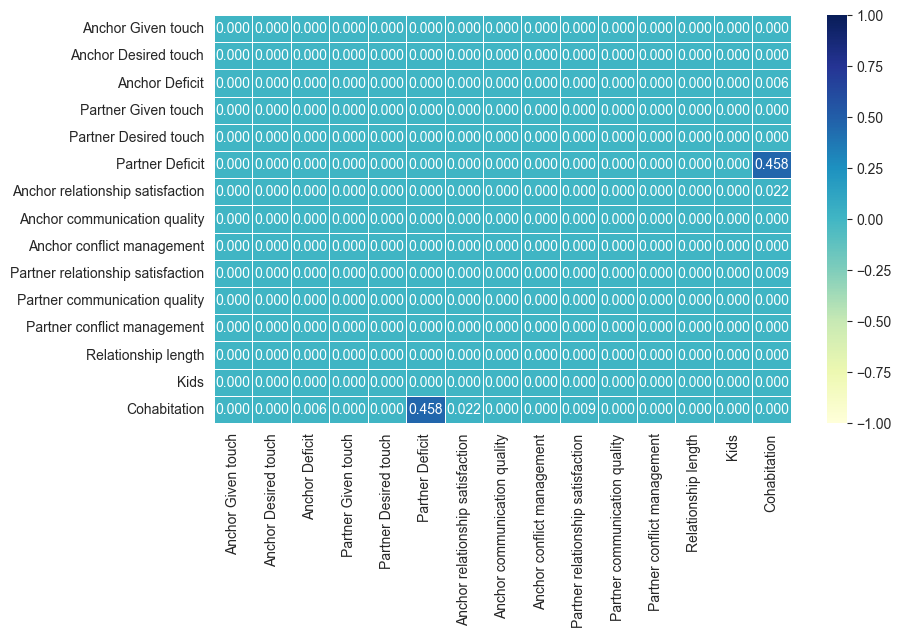

In [17]:
pvalues = df[relationship_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
    len(df[relationship_factors].columns))
plt.figure(figsize=(9.3, 5.3))
plt.tight_layout()
sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})

In [18]:
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]

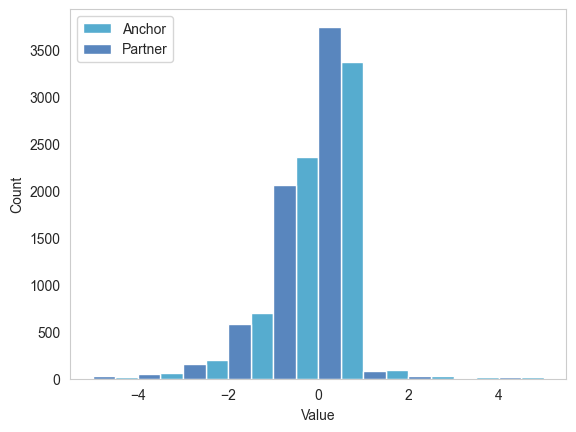

In [19]:
# Reshape dataframe to long format
df_melted = df.melt(value_vars=['Anchor Deficit', 'Partner Deficit'], var_name='Source', value_name='Value')

# Plot
sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=1,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             )
plt.grid(False)
plt.legend(loc='upper left', labels=["Anchor", "Partner"])
#plt.savefig('output/img/Deficit_histogram.png', dpi=350, transparent=True)


In [20]:
def calculate_freq(input_var):
    n = df[input_var].count()
    m = [
        np.sum(df[input_var] < 1),
        np.sum((df[input_var] >= 1) & (df[input_var] < 2)),
        np.sum((df[input_var] >= 2) & (df[input_var] < 3)),
        np.sum((df[input_var] >= 3) & (df[input_var] < 4)),
        np.sum((df[input_var] >= 4) & (df[input_var] < 5)),
        np.sum(df[input_var] >= 5)
    ]

    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


vars = ['Anchor Given touch',
        'Anchor Desired touch',
        'Partner Given touch',
        'Partner Desired touch',
        'Anchor kiss given',
        'Anchor kiss desired',
        'Partner kiss given',
        'Partner kiss desired',
        'Anchor hold given',
        'Anchor hold desired',
        'Partner hold given',
        'Partner hold desired',
        'Anchor hug given',
        'Anchor hug desired',
        'Partner hug given',
        'Partner hug desired',
        ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]
frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(vars):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)



In [21]:
fig_names = ['Anchor overall touch', 'Partner overall touch',
             'Anchor kiss touch', 'Partner kiss touch',
             'Anchor hold touch', 'Partner hold touch',
             'Anchor hug touch', 'Partner hug touch'
             ]

lines_w = 3

for i, name in enumerate(fig_names):
    ax = None
    ax1 = None

    ax = sns.barplot(frequency_map[vars[i]],
                     linewidth=lines_w,
                     edgecolor=colors,
                     facecolor=(0, 0, 0, 0)
                     )
    for bar in ax.patches:
        bar.set_linestyle('--')
        bar.set_linewidth(lines_w)

    ax1 = sns.barplot(frequency_map[vars[i + 1]],
                      linewidth=lines_w,
                      edgecolor=colors,
                      facecolor=(0, 0, 0, 0)
                      )

    multiplier = 0

    for attribute, measurement in frequency_map[vars[i]].items():
        offset = multiplier
        rects = ax.bar(offset,
                       measurement,
                       label=attribute,
                       edgecolor=colors[multiplier],
                       facecolor=(0, 0, 0, 0)
                       )
        ax.bar_label(rects)
        multiplier += 1

    multiplier = 0

    for attribute, measurement in frequency_map[vars[i + 1]].items():
        offset = multiplier
        rects = ax1.bar(offset,
                        measurement,
                        label=attribute,
                        edgecolor=colors[multiplier],
                        facecolor=(0, 0, 0, 0))
        ax1.bar_label(rects, label_type='center')
        multiplier += 1

    plt.grid(False)
    plt.tight_layout()
    plt.ylim(0, 40)
    plt.ylabel("Percentage")
    plt.xticks(range(6), labels=labels)
    # plt.savefig('output/img/frequency/' + name + '.png', dpi=350, transparent=True, bbox_inches='tight')
    plt.close()

In [22]:
# Calculate means for touch variables
for i in range(0, len(df)):
    if df['Anchor Given touch'][i] == 0:
        df.loc[i, 'Anchor Given (count)'] = '0x'
    if 0 < df['Anchor Given touch'][i] <= 1:
        df.loc[i, 'Anchor Given (count)'] = '1-5x'
    if 1 < df['Anchor Given touch'][i] <= 2:
        df.loc[i, 'Anchor Given (count)'] = '6-10x'
    if 2 < df['Anchor Given touch'][i] <= 3:
        df.loc[i, 'Anchor Given (count)'] = '11-20x'
    if 3 < df['Anchor Given touch'][i] <= 4:
        df.loc[i, 'Anchor Given (count)'] = '21-50x'
    if 4 < df['Anchor Given touch'][i] <= 5:
        df.loc[i, 'Anchor Given (count)'] = '> 50x'

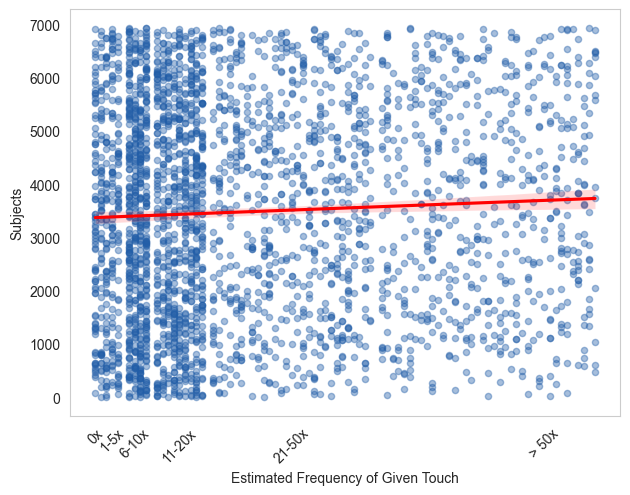

In [23]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 90)
    else:
        return np.nan


df["x_value"] = df["Anchor Desired touch"].apply(map_to_random_value)
sns.regplot(data=df, x="x_value", y=df.index,
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#225ea8"},
            line_kws={'color': 'red'},
            #x_jitter=1
            )
plt.xlabel("Estimated Frequency of Given Touch")
plt.ylabel("Subjects")
# plt.title("Scatter Plot with Ordinal Variable Mapped to Random Ranges")

plt.tight_layout()
plt.grid(False)
plt.xticks(rotation=45)
plt.xticks([0, 3, 7, 15, 35, 80], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.savefig('output/img/scatter/scatterAnchor_des.png', dpi=350, transparent=True)

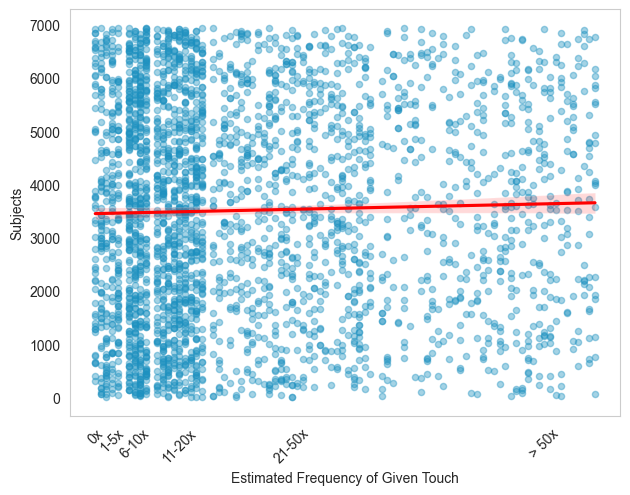

In [24]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 90)
    else:
        return np.nan


df["x_value"] = df["Partner Desired touch"].apply(map_to_random_value)
sns.regplot(data=df, x="x_value", y=df.index,
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#1d91c0"},
            line_kws={'color': 'red'},
            #x_jitter=1
            )
plt.xlabel("Estimated Frequency of Given Touch")
plt.ylabel("Subjects")
# plt.title("Scatter Plot with Ordinal Variable Mapped to Random Ranges")

plt.tight_layout()
plt.grid(False)
plt.xticks(rotation=45)
plt.xticks([0, 3, 7, 15, 35, 80], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.savefig('output/img/scatter/scatterPartner_des.png', dpi=350, transparent=True)

([<matplotlib.axis.XTick at 0x191b13ba000>,
 [Text(0, 0, '0x'),
  Text(1, 0, '1-5x'),
  Text(2, 0, '6-10x'),
  Text(3, 0, '11-20x'),
  Text(4, 0, '21-50x'),
  Text(5, 0, '> 50x')])

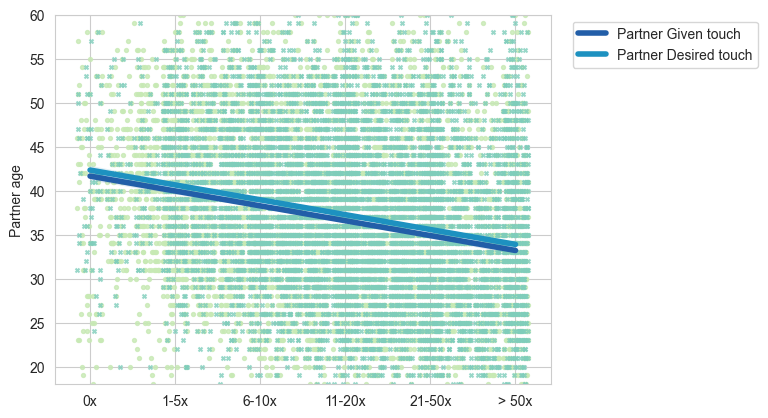

In [25]:
sns.regplot(data=df,
            y='Partner age',
            x='Partner Given touch',
            logistic=False,
            ci=95,
            scatter=True,
            scatter_kws={"s": 8, "color": "#c7e9b4", "label": "_nolegend_"},
            line_kws={"label": "Partner Given touch",
                      "color": "#225ea8",
                      "linewidth": 4, },
            x_jitter=.15
            )

sns.regplot(data=df,
            y='Partner age',
            x='Partner Desired touch',
            logistic=False,
            ci=95,
            scatter=True,
            marker="x",
            scatter_kws={"s": 8, "color": "#7fcdbb", "label": "_nolegend_"},
            line_kws={"label": "Partner Desired touch",
                      "color": "#1d91c0",
                      "linewidth": 4, },
            x_jitter=.15
            )
plt.ylim(18, 60)
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img/scatter/scatterPartner.png', dpi=350, transparent=True, bbox_inches='tight')

In [26]:
sns.set_theme(style='white')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Given touch vs. 5.0_Anchor Given touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.731e-11 U_stat=1.784e+04
1.0_Anchor Desired touch vs. 5.0_Anchor Desired touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.670e-11 U_stat=1.628e+04


([<matplotlib.axis.XTick at 0x191b016af60>,
 [Text(0, 0, '18-20 years'),
  Text(1, 0, '21-30 years'),
  Text(2, 0, '31-40 years'),
  Text(3, 0, '41-50 years'),
  Text(4, 0, '51+ years')])

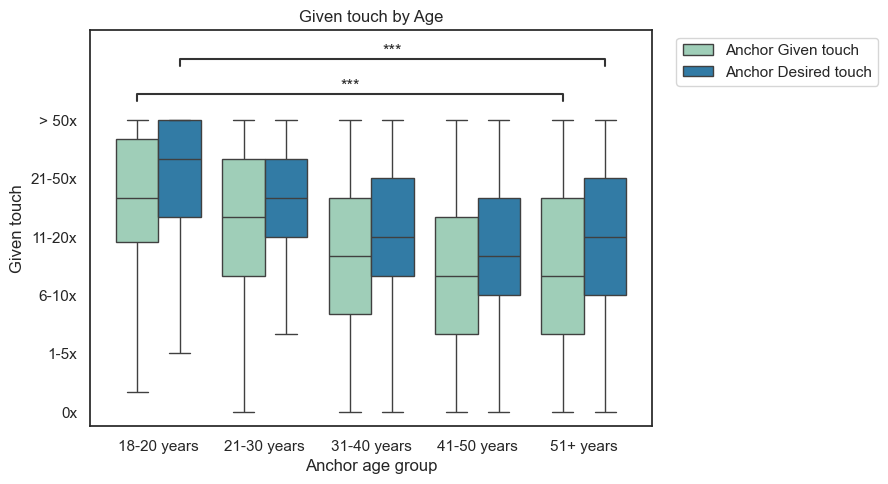

In [27]:
df1 = df.melt(id_vars='Anchor age group',
              value_vars=['Anchor Given touch', 'Anchor Desired touch'],
              var_name='Touch index', value_name='Touch Freq'
              )
pairs = [
    ((1, "Anchor Given touch"), (5, "Anchor Given touch")),
    ((1, "Anchor Desired touch"), (5, "Anchor Desired touch")),
]

x = "Anchor age group"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Given touch', 'Anchor Desired touch']

ax = sns.boxplot(data=df1, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df1, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

#TODO:get p-value


annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("Given touch")
plt.title("Given touch by Age")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
# plt.savefig('output/img/comparisons/Anchor-age.png', dpi=350, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Partner Given touch vs. 5.0_Partner Given touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.149e-12 U_stat=4.915e+04
1.0_Partner Desired touch vs. 5.0_Partner Desired touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.275e-12 U_stat=4.695e+04
1.1486484418539775e-12
1.2748949710667603e-12


([<matplotlib.axis.YTick at 0x191b103fd70>,
 [Text(0, 0, '0x'),
  Text(0, 1, '1-5x'),
  Text(0, 2, '6-10x'),
  Text(0, 3, '11-20x'),
  Text(0, 4, '21-50x'),
  Text(0, 5, '> 50x')])

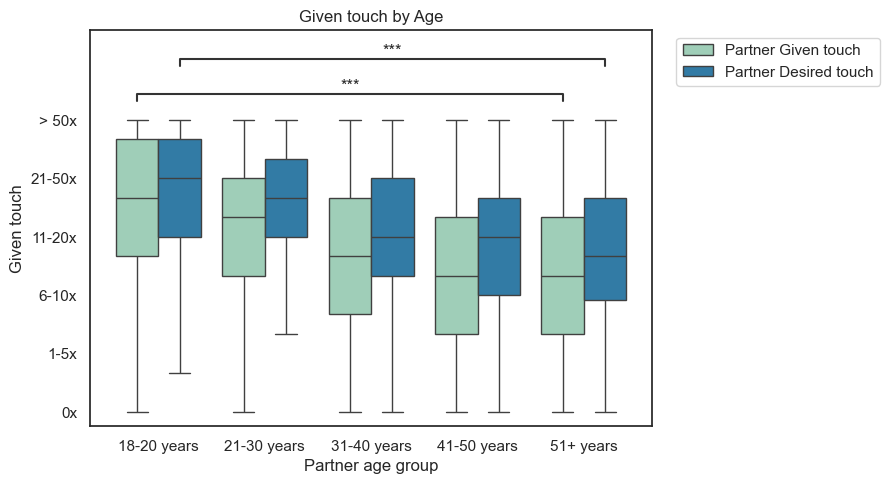

In [28]:
df1 = df.melt(id_vars='Partner age group',
              value_vars=['Partner Given touch', 'Partner Desired touch'],
              var_name='Touch index', value_name='Touch Freq'
              )
pairs = [
    ((1, "Partner Given touch"), (5, "Partner Given touch")),
    ((1, "Partner Desired touch"), (5, "Partner Desired touch")),
]

x = "Partner age group"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Partner Given touch', 'Partner Desired touch']

ax = sns.boxplot(data=df1, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df1, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                # pvalue_thresholds=[[0.001, '*** (p < 0.001)'], [0.01, '** (p < 0.01)'], [0.05, '* (p < 0.05)'],
                #                    [1, 'ns']],
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']],
                text_format='star'
                )
annot.apply_test()

_, test_results = annot.annotate()
print(test_results[0].data.pvalue)
print(test_results[1].data.pvalue)

plt.tight_layout()
plt.ylabel("Given touch")
plt.title("Given touch by Age")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig('output/img/comparisons/Partner-age.png', dpi=350, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Given touch vs. 5.0_Anchor Given touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.817e-75 U_stat=5.829e+05
1.0_Anchor Desired touch vs. 5.0_Anchor Desired touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.154e-68 U_stat=5.341e+05


([<matplotlib.axis.YTick at 0x191b1ba34a0>,
 [Text(0, 0, '0x'),
  Text(0, 1, '1-5x'),
  Text(0, 2, '6-10x'),
  Text(0, 3, '11-20x'),
  Text(0, 4, '21-50x'),
  Text(0, 5, '> 50x')])

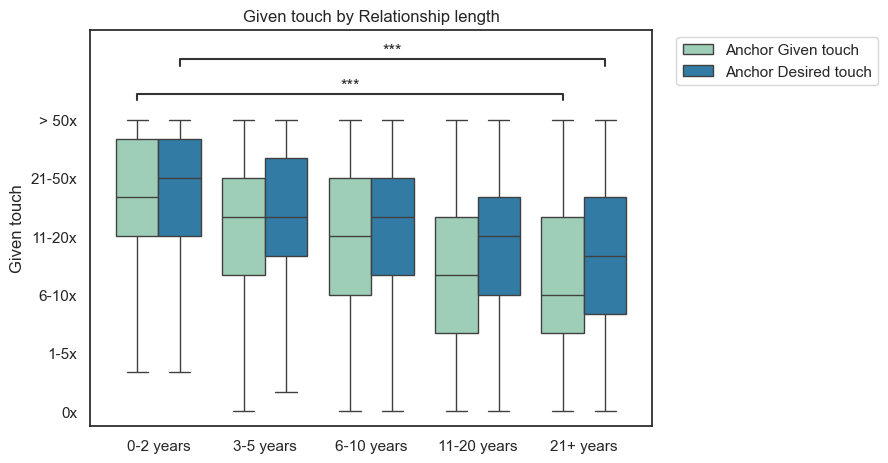

In [29]:
touching = df.melt(id_vars='Relationship length',
                   value_vars=['Anchor Given touch', 'Anchor Desired touch',
                               'Partner Given touch',
                               'Partner Desired touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Relationship length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Given touch', 'Anchor Desired touch']
pairs = [
    ((1, "Anchor Given touch"), (5, "Anchor Given touch")),
    ((1, "Anchor Desired touch"), (5, "Anchor Desired touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.xlabel("")
plt.ylabel("Given touch")
plt.title("Given touch by Relationship length")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.savefig("output/img/comparisons/Anchor-relationlength.png", dpi=350, transparent=True)

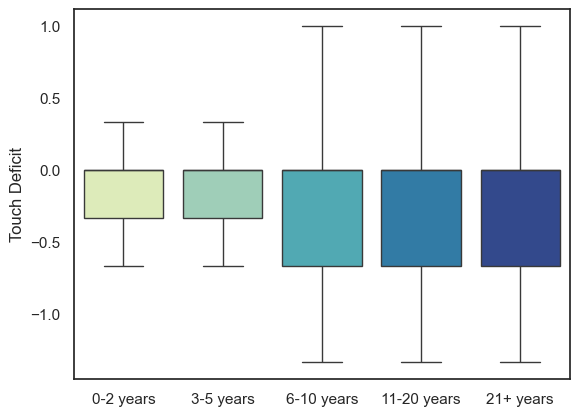

In [47]:
sns.boxplot(data=df,
            x="Relationship length",
            y="Anchor Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
# plt.ylim(-4.5, 2.5)
plt.xlabel("")
plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.savefig("output/img/comparisons/Anchor-rel-len-deficit.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Partner Given touch vs. 5.0_Partner Given touch: Mann-Whitney-Wilcoxon test two-sided, P_val:5.805e-70 U_stat=5.755e+05
1.0_Partner Desired touch vs. 5.0_Partner Desired touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-49 U_stat=5.301e+05


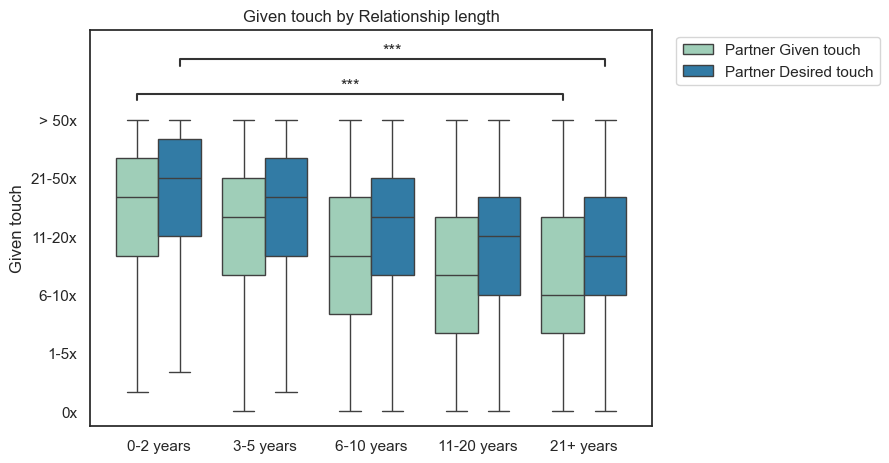

In [106]:
touching = df.melt(id_vars='Relationship length',
                   value_vars=['Anchor Given touch', 'Anchor Desired touch',
                               'Partner Given touch',
                               'Partner Desired touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Relationship length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Partner Given touch', 'Partner Desired touch']
pairs = [
    ((1, "Partner Given touch"), (5, "Partner Given touch")),
    ((1, "Partner Desired touch"), (5, "Partner Desired touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.xlabel("")
plt.ylabel("Given touch")
plt.title("Given touch by Relationship length")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# plt.savefig("output/img/comparisons/Partner-relationlength.png", dpi=350, transparent=True)

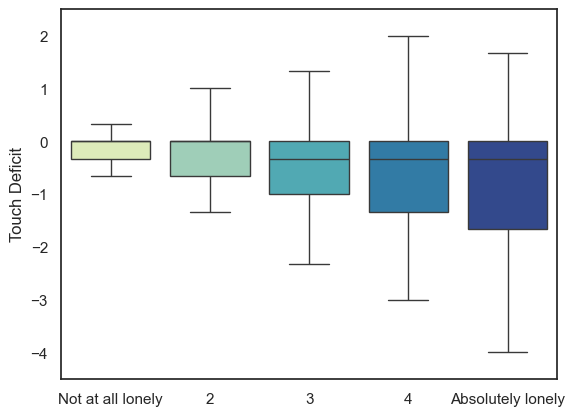

In [48]:
sns.boxplot(data=df,
            x="Anchor loneliness",
            y="Anchor Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
plt.ylim(-4.5, 2.5)
plt.xlabel("")
plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
plt.savefig("output/img/comparisons/Anchor-loneliness.png", dpi=350, transparent=True)

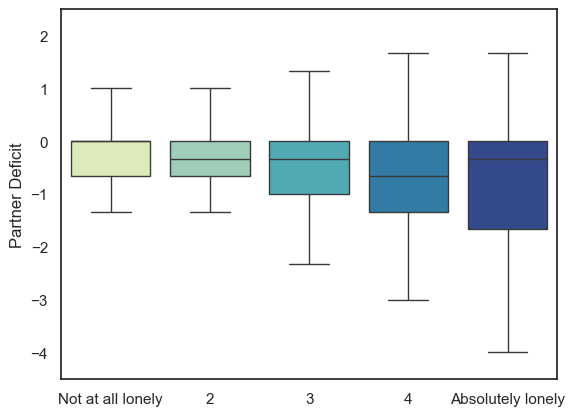

In [108]:
sns.boxplot(data=df,
            x="Partner loneliness",
            y="Partner Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
plt.ylim(-4.5, 2.5)
plt.xlabel("")
#plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img/comparisons/Partner-loneliness.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_Anchor Given touch vs. 10.0_Anchor Given touch: t-test independent samples, P_val:9.204e-36 t=-1.262e+01
2.0_Anchor Desired touch vs. 10.0_Anchor Desired touch: t-test independent samples, P_val:2.878e-27 t=-1.091e+01


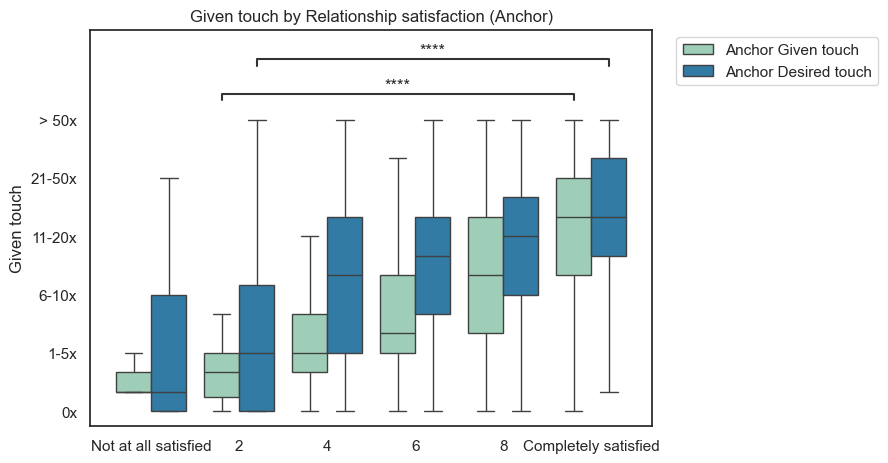

In [109]:
touching = df.melt(id_vars='Anchor relationship satisfaction',
                   value_vars=['Anchor Given touch', 'Anchor Desired touch',
                               'Partner Given touch',
                               'Partner Desired touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Anchor relationship satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Given touch', 'Anchor Desired touch']
pairs = [
    ((2, "Anchor Given touch"), (10, "Anchor Given touch")),
    ((2, "Anchor Desired touch"), (10, "Anchor Desired touch"))
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.xlabel("")
plt.ylabel("Given touch")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.title("Given touch by Relationship satisfaction (Anchor)")
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img/comparisons/Anchor-relationsat.png", dpi=350, transparent=True)

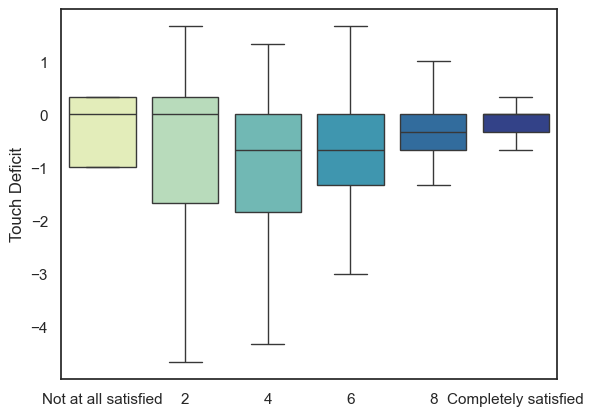

In [49]:
sns.boxplot(data=df,
            x="Anchor relationship satisfaction",
            y="Anchor Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
# plt.ylim(-4.5, 2.5)
plt.xlabel("")
plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img/comparisons/Anchor-rel-sat-deficit.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_Partner Given touch vs. 10.0_Partner Given touch: t-test independent samples, P_val:1.263e-29 t=-1.141e+01
2.0_Partner Desired touch vs. 10.0_Partner Desired touch: t-test independent samples, P_val:1.276e-15 t=-8.036e+00


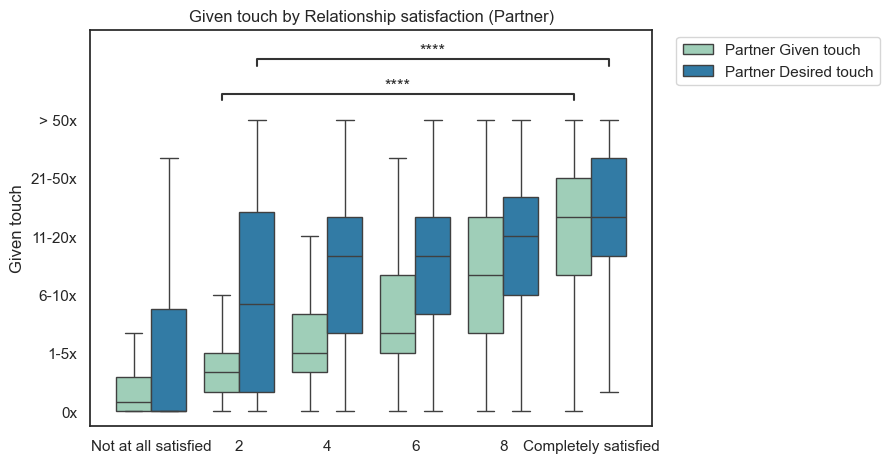

In [110]:
touching = df.melt(id_vars='Partner relationship satisfaction',
                   value_vars=['Anchor Given touch', 'Anchor Desired touch',
                               'Partner Given touch',
                               'Partner Desired touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Partner relationship satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Partner Given touch', 'Partner Desired touch']
pairs = [
    ((2, "Partner Given touch"), (10, "Partner Given touch")),
    ((2, "Partner Desired touch"), (10, "Partner Desired touch"))
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.xlabel("")
plt.ylabel("Given touch")
plt.title("Given touch by Relationship satisfaction (Partner)")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img/comparisons/Partner-relationsat.png", dpi=350, transparent=True)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_Anchor Deficit vs. 5.0_Anchor Deficit: t-test independent samples, P_val:6.941e-05 t=3.988e+00
1.0_Partner Deficit vs. 5.0_Partner Deficit: t-test independent samples, P_val:6.135e-12 t=6.924e+00


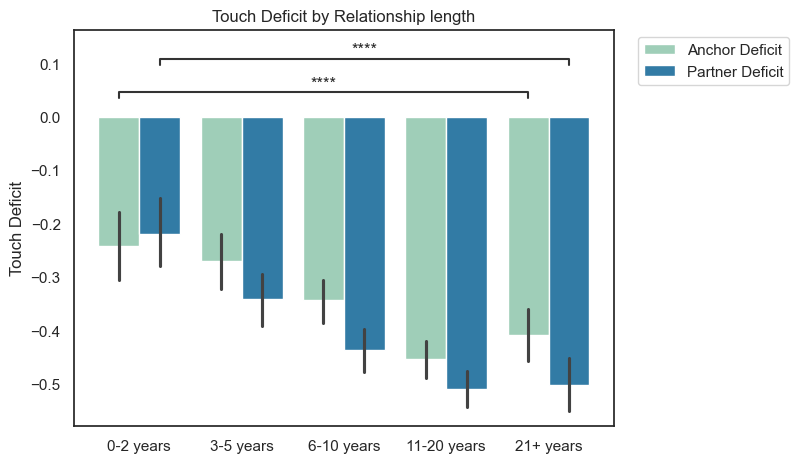

In [111]:
discrepancy = df.melt(id_vars='Relationship length',
                      value_vars=['Anchor Deficit', 'Partner Deficit'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
x = "Relationship length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Deficit', 'Partner Deficit']
pairs = [
    ((1, "Anchor Deficit"), (5, "Anchor Deficit")),
    ((1, "Partner Deficit"), (5, "Partner Deficit")),
]

ax = sns.barplot(data=discrepancy,
                 x=x,
                 y=y,
                 hue=hue,
                 palette='YlGnBu',
                 # style=hue,
                 # markers=True
                 )

annot = Annotator(ax, pairs, data=discrepancy, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.xlabel("")
plt.grid(False)
plt.ylabel("Touch Deficit")
plt.title("Touch Deficit by Relationship length")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# plt.savefig("output/img/comparisons/touch_diff_relen.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_Anchor Deficit vs. 10.0_Anchor Deficit: t-test independent samples, P_val:4.635e-04 t=-3.504e+00
2.0_Partner Deficit vs. 10.0_Partner Deficit: t-test independent samples, P_val:2.053e-06 t=-4.756e+00


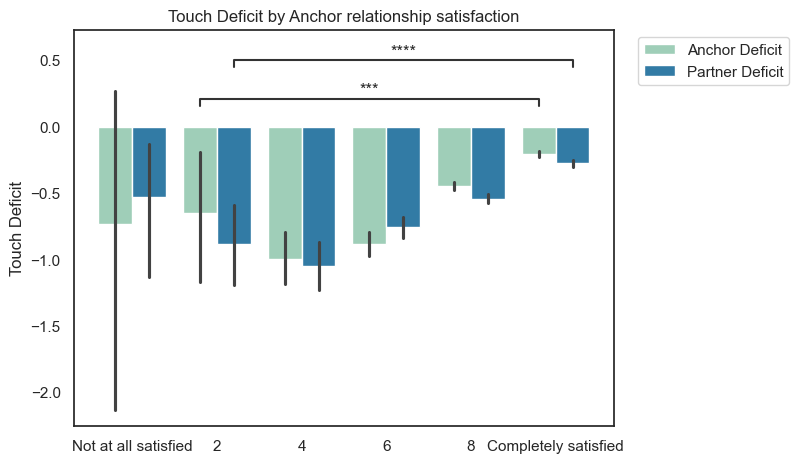

In [112]:
discrepancy = df.melt(id_vars='Anchor relationship satisfaction',
                      value_vars=['Anchor Deficit', 'Partner Deficit'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
x = "Anchor relationship satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Deficit', 'Partner Deficit']
pairs = [
    ((2, "Anchor Deficit"), (10, "Anchor Deficit")),
    ((2, "Partner Deficit"), (10, "Partner Deficit")),
]

ax = sns.barplot(data=discrepancy,
                 x=x,
                 y=y,
                 hue=hue,
                 palette='YlGnBu',
                 # style=hue,
                 # markers=True
                 )

annot = Annotator(ax, pairs, data=discrepancy, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.grid(False)
plt.tight_layout()
plt.ylabel("Touch Deficit")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.title("Touch Deficit by Anchor relationship satisfaction")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img/comparisons/touch_diff_relen.png", dpi=350, transparent=True)

Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

1. There is a Strong correlation between touch experienced and touch desired for both Anchor (0.82) and Partner (0.81)
2. There is a Moderate correlation for communication quality between anchor and partner (0,56)
3. There is a Moderate correlation for experienced touch between anchor and partner (0.54)
4. There is a Moderate correlation between partner relationship satisfaction and communication quality (0,46)
5. There is a Moderate correlation between partner experienced touch and anchor desired touch (0,45)
6. There is a Moderate correlation between anchor experienced touch and partner desired touch (0,43)
7. There is a Moderate correlation between touch experienced and perceived communication quality within the relationship for the anchor (0.43)
8. There is a Moderate correlation between anchor desired touch and partner desired touch (0,40)

From Yvonee

Key predictors of higher touch frequency were
1. higher relationship satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age

In [113]:
for i in range(0, len(df)):
    if df['Anchor kiss given'][i] == df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = 0

    if df['Anchor kiss given'][i] > df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = 1

    if df['Anchor kiss given'][i] < df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = -1

    if (df['Anchor kiss given'][i] > df['Partner kiss given'][i]) and (
            df['Anchor kiss given'][i] - df['Partner kiss given'][i]) > 2:
        df.loc[i, "kiss_diff"] = 2

    if (df['Anchor kiss given'][i] < df['Partner kiss given'][i]) and (
            df['Anchor kiss given'][i] - df['Partner kiss given'][i]) < -2:
        df.loc[i, "kiss_diff"] = -2

    # --- Hold --- #
    if df['Anchor hold given'][i] == df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = 0

    if df['Anchor hold given'][i] > df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = 1

    if df['Anchor hold given'][i] < df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = -1

    if (df['Anchor hold given'][i] > df['Partner hold given'][i]) and (
            df['Anchor hold given'][i] - df['Partner hold given'][i]) > 2:
        df.loc[i, "hold_diff"] = 2

    if (df['Anchor hold given'][i] < df['Partner hold given'][i]) and (
            df['Anchor hold given'][i] - df['Partner hold given'][i]) < -2:
        df.loc[i, "hold_diff"] = -2

    # --- Intimacy (Hug) --- #
    if df['Anchor hug given'][i] == df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = 0

    if df['Anchor hug given'][i] > df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = 1

    if df['Anchor hug given'][i] < df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = -1

    if (df['Anchor hug given'][i] > df['Partner hug given'][i]) and (
            df['Anchor hug given'][i] - df['Partner hug given'][i]) > 2:
        df.loc[i, "hug_diff"] = 2

    if (df['Anchor hug given'][i] < df['Partner hug given'][i]) and (
            df['Anchor hug given'][i] - df['Partner hug given'][i]) < -2:
        df.loc[i, "hug_diff"] = -2

    # --- Overall --- #
    if df['Anchor Deficit'][i] == df['Partner Deficit'][i]:
        df.loc[i, "overall_diff"] = 0

    if df['Anchor Deficit'][i] > df['Partner Deficit'][i]:
        df.loc[i, "overall_diff"] = 1

    if df['Anchor Deficit'][i] < df['Partner Deficit'][i]:
        df.loc[i, "overall_diff"] = -1

    if (df['Anchor Deficit'][i] > df['Partner Deficit'][i]) and (
            df['Anchor Deficit'][i] - df['Partner Deficit'][i]) > 2:
        df.loc[i, "overall_diff"] = 2

    if (df['Anchor Deficit'][i] < df['Partner Deficit'][i]) and (
            df['Anchor Deficit'][i] - df['Partner Deficit'][i]) < -2:
        df.loc[i, "overall_diff"] = -2

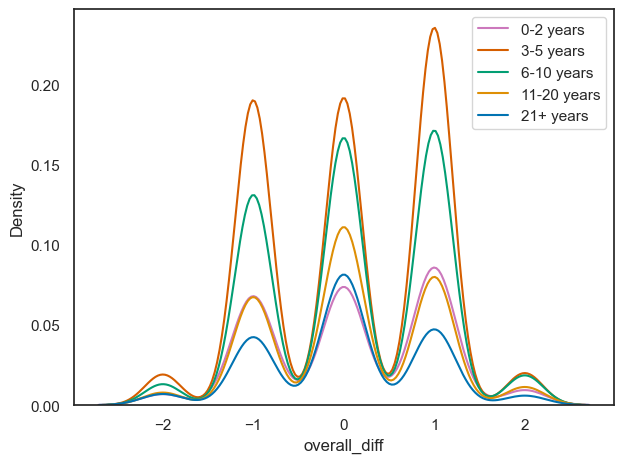

In [114]:
fig, ax = plt.subplots()

sns.kdeplot(
    data=df,
    x="overall_diff",
    hue="Relationship length",
    palette='colorblind',
)
plt.tight_layout()

ax.legend(labels=["0-2 years",
                  "3-5 years",
                  "6-10 years",
                  "11-20 years",
                  "21+ years"])
ax.grid(False)
# plt.savefig("output/img/KDE.png", dpi=350, transparent=True)

In [ ]:
# # https://seaborn.pydata.org/examples/kde_ridgeplot.html
duration_options = {
    1: '0-2 years',
    2: '3-5 years',
    3: '6-10 years',
    4: '11-20 years',
    5: '21+ years'
}

df['text Relationship'] = df['Relationship length'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Relationship length",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "overall_diff",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "overall_diff", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("Touch behavior")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# plt.savefig("output/img/KDE_linear.png", dpi=350, transparent=True)

In [ ]:
sns.boxplot(data=df,
            x="Kids",
            y="Anchor Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
# plt.ylim(-4.5, 2.5)
plt.xlabel("")
plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.savefig("output/img/comparisons/Anchor-kids-deficit.png", dpi=350, transparent=True)

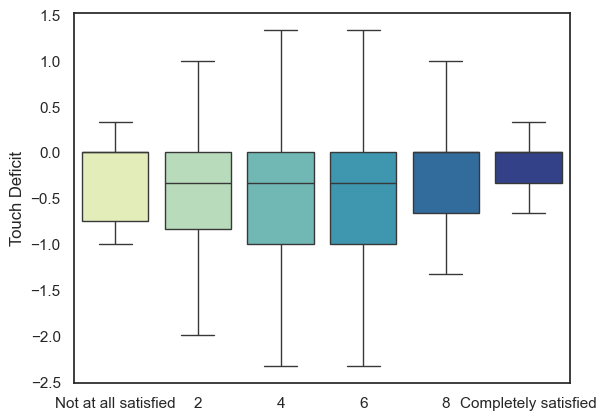

In [54]:
sns.boxplot(data=df,
            x="Anchor life satisfaction",
            y="Anchor Deficit",
            showfliers=False,
            palette='YlGnBu',
            )
# plt.ylim(-4.5, 2.5)
plt.xlabel("")
plt.ylabel("Touch Deficit")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
plt.savefig("output/img/comparisons/Anchor-life-sat-deficit.png", dpi=350, transparent=True)